# 모델 학습과 손실 함수

## 모델의 학습


### 지도 학습 vs 비지도 학습

- 지도 학습 (Supervised Learning)
  - 입력에 대한 정답 (Label, Ground Truth)이 존재  
  - [입력 - 정답] 관계를 학습하여 새로운 입력에 대해 정답을 맞추는 과정

- 비지도 학습 (Unsupervised Learning)
  - 정답이 없음
  - 데이터로부터 어떤 알고리즘을 통해 유용한 정보를 추출  

![](https://www.researchgate.net/publication/329533120/figure/fig1/AS:702267594399761@1544445050584/Supervised-learning-and-unsupervised-learning-Supervised-learning-uses-annotation.png)
<br /><sub>출처: https://www.researchgate.net/figure/Supervised-learning-and-unsupervised-learning-Supervised-learning-uses-annotation_fig1_329533120</sub>




## 학습 매개변수(Trainable Parameter)
- 학습 시, 값이 변화하는 매개변수  
  이 매개변수에 따라 학습 알고리즘(모델)이 변함

- 입력에 따른 출력을 나타내는 수식, 이를 학습 모델이라고 칭함  
  선형회귀(Linear Regression)을 예로 들면,

### $\qquad \quad Y = aX + b $  

  - $X$ : 입력
  - $Y$ : 출력
  - $a, b$ : 학습 매개변수

- 초기화된 모델(Left Image)로부터 학습이 진행되면서  
  학습 데이터에 맞는 모델(Right Image)로 학습 파라미터(Trainable Parameters)를 수정해 나가는 과정 
  
![](https://learningstatisticswithr.com/book/lsr_files/figure-html/regression1b-1.png)

![](https://learningstatisticswithr.com/book/lsr_files/figure-html/regression1a-1.png)

<sub>출처: https://learningstatisticswithr.com/book/regression.html</sub>

## 하이퍼 파라미터(Hyper Parameter)
- 사람이 직접 설정해야하는 매개변수
- 학습이 되기전 미리 설정되어 상수취급
  - 손실 함수 (Cost Function)
  - 학습률 (Learning Rate)
  - 학습 반복 횟수 (Epochs)
  - 미니 배치 크기 (Batch Size)
  - 은닉층의 노드 개수 (Units)
  - 노이즈 (Noise)
  - 규제화 (Regularization)
  - 가중치 초기화 (Weights Initialization)

- 신경망의 매개변수인 가중치는 학습 알고리즘에 의해 **자동**으로 갱신

## 손실함수 (Loss Function, Cost Function)

- 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
- 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
- 최적화 이론에서 최소화 하고자 하는 함수
- <u>**미분 가능한 함수 사용**</u>

![](https://drive.google.com/uc?id=1SMxO-SrTzm8-Fq07T_rdkLnukxgPlmuL)
<br /><sub>출처: https://zhuanlan.zhihu.com/p/85540935\</sub>



### **학습**의 수학적 의미  

![](https://s3.amazonaws.com/images.internalpointers.com/2017/10/non-convex-function.svg)
<br /><sub>출처: https://www.internalpointers.com/post/cost-function-logistic-regression</sub>

  ### $\qquad \qquad \tilde{\theta} = arg \underset{\theta} min \ L(x, y\ ; \theta) $

  - L : 손실 함수
  - x : 학습에 사용되는 데이터의 입력값
  - y : 학습에 사용되는 데이터의 정답
  - $\theta$ : 학습될 모든 파라미터(parameter)를 모은 벡터
  - $\tilde{\theta}$ : 추정된 최적의 파라미터

  - 학습에 사용되는 파라미터(parameter, $\ i.g \ $가중치($weights$), 편향($bias$), $\ ...$ )를 모두 통칭해서 $\theta$로 표현 가능  
  이러한 $\theta$의 최적값을 찾는 것이 학습

  - <u>학습 데이터 입력 x와 $\theta$에 따라 나온 예측값(predicted value)이 정답 y(label)와 비교하여 $\theta$를 조절</u>해나가는 과정

![](https://miro.medium.com/max/790/0*i6BmKLtTE5t89kJX)
<br /><sub>출처: https://medium.com/@dhartidhami/machine-learning-basics-model-cost-function-and-gradient-descent-79b69ff28091</sub>

  - 즉, **최적의 $\theta$값에 따라 손실 함수의 가장 최저점(최솟값)을 찾는 과정**

  - 손실 함수는 지도 학습(supervised learning) 알고리즘에서 반드시 필요!

### 원-핫 인코딩(one-hot encoding)
- 범주형 변수를 표현할 때 사용
- 가변수(Dummy Variable)이라고도 함
- 정답인 레이블을 제외하고 0으로 처리  

![](https://miro.medium.com/max/1400/0*T5jaa2othYfXZX9W.)
<sub>출처: https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179</sub>


In [3]:
import numpy as np

def convert_one_hot(labels, num_classes):
    one_hot_result = np.zeros((len(labels), num_classes))
    for idx, label in enumerate(labels):
        one_hot_result[idx][label] = 1
        
    return one_hot_result

In [4]:
x_label = [1, 3, 3, 4, 2, 0, 5, 3, 0]
print(convert_one_hot(x_label, max(x_label)+1))

[[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [5]:
from keras.utils.np_utils import to_categorical

x_label = np.array([3, 2, 0, 1, 1, 6, 4, 5])

one_hot_label = to_categorical(x_label)
print(one_hot_label)

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


In [6]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def convert_one_hot_sklearn(class_label):
    
    encoder = LabelEncoder()
    encoder.fit(class_label)
    labels = encoder.transform(class_label)
    # 2차원데이터로 변환
    labels = labels.reshape(-1, 1)
    
    oh_encoder = OneHotEncoder()
    oh_labels = oh_encoder.fit_transform(labels)
    
    return oh_labels.toarray()

In [7]:
marvel_labels = ['아이언맨', '캡틴 아메리카', '헐크', '블랙위도우', '스파이더맨', '앤트맨']
ohe = convert_one_hot_sklearn(marvel_labels)
print(ohe)
print('One hot encoder datatype:', type(ohe))
print('One hot encoder shape:', ohe.shape)
print('------------------------')

classes = [3, 2, 1, 3, 0, 4, 5, 3, 0]
ohe = convert_one_hot_sklearn(classes)
print(ohe)
print('One hot encoder datatype:', type(ohe))
print('One hot encoder shape:', ohe.shape)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
One hot encoder datatype: <class 'numpy.ndarray'>
One hot encoder shape: (6, 6)
------------------------
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
One hot encoder datatype: <class 'numpy.ndarray'>
One hot encoder shape: (9, 6)


In [8]:
import pandas as pd

df = pd.DataFrame({'labels' : ['아이언맨', '캡틴 아메리카', '헐크', '블랙위도우', '스파이더맨', '앤트맨']})
ohe_df = pd.get_dummies(df['labels'])
ohe_df

,블랙위도우,스파이더맨,아이언맨,앤트맨,캡틴 아메리카,헐크
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,1,0,0,0,0
5,0,0,0,1,0,0


### 평균절대오차(Mean Absolute Error, MAE)

- 오차가 커져도 손실함수가 일정하게 증가

- 이상치(Outlier)에 강건함(Robust)
  -  데이터에서 [입력 - 정답] 관계가 적절하지 않은 것이 있을 경우에, 좋은 추정을 하더라도 오차가 발생하는 경우가 발생
  - 그 때, 해당 이상치에 해당하는 지점에서 손실 함수의 최소값으로 가는 정도의 영향력이 크지 않음

- 중간값(Median)과 연관

- 회귀 (Regression)에 많이 사용

![](https://miro.medium.com/max/1152/1*8BQhdKu1nk-tAAbOR17qGg.png)
<br /><sub>출처: https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0</sub>

### $ \qquad \qquad E = \frac{1}{n}\sum_{i=1}^n \left | y_i - \tilde{y}_i \right |$

- $y_i$ : 학습 데이터의 $i\ $번째 정답

- $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력

In [9]:
def MAE(y, pred_y):
    return np.mean(np.abs((y - pred_y)))

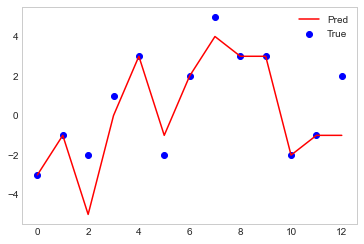

In [12]:
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

y = np.array([-3, -1, -2, 1, 3, -2, 2, 5, 3, 3, -2, -1, 2])
yhat = np.array([-3, -1, -5, 0, 3, -1, 2, 4, 3, 3, -2, -1, -1])
x = list(range(len(y)))

plt.scatter(x, y, color = 'b', label = 'True')
plt.plot(x, yhat, color = 'r', label = 'Pred')
plt.legend()
plt.grid()
plt.show()

In [13]:
print(MAE(y, yhat))

0.6923076923076923


### 평균제곱오차(Mean Squared Error, MSE)
- 가장 많이 쓰이는 손실 함수 중 하나

- 오차가 커질수록 손실함수가 빠르게 증가
  - 정답과 예측한 값의 차이가 클수록 더 많은 페널티를 부여

- 회귀 (Regression)에 쓰임

![](https://miro.medium.com/max/1152/1*EqTaoCB1NmJnsRYEezSACA.png)
<br /><sub>출처: https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0</sub>

### $ \qquad \qquad E = \frac{1}{n}\sum_{i=1}^n ( y_i - \tilde{y}_i)^2 $

  - $y_i$ : 학습 데이터의 $i\ $번째 정답

  - $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력

In [14]:
def MSE(y, pred_y):
  return np.mean(np.sum(np.square((y - pred_y))))

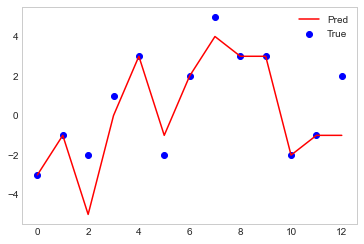

In [15]:
y = np.array([-3, -1, -2, 1, 3, -2, 2, 5, 3, 3, -2, -1, 2])
yhat = np.array([-3, -1, -5, 0, 3, -1, 2, 4, 3, 3, -2, -1, -1])
x = list(range(len(y)))

plt.scatter(x, y, color = 'b', label = 'True')
plt.plot(x, yhat, color = 'r', label = 'Pred')
plt.legend()
plt.grid()
plt.show()

In [16]:
print(MSE(y, yhat))

21.0


### 손실함수로서의 MAE와 MSE 비교

![](https://miro.medium.com/max/1400/1*JTC4ReFwSeAt3kvTLq1YoA.png)
<br /><sub>출처: https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0</sub>

### 교차 엔트로피 오차(Cross Entropy Error, CEE)

- 이진 분류(Binary Classification), 다중 클래스 분류(Multi Class Classification)

- 소프트맥스(softmax)와 원-핫 인코딩(ont-hot encoding) 사이의 출력 간 거리를 비교

- 정답인 클래스에 대해서만 오차를 계산
  - 정답을 맞추면 오차가 0, 틀리면 그 차이가 클수록 오차가 무한히 커짐

### $ \qquad \qquad E = - \frac{1}{N}\sum_{n} \sum_{i}  y_i\ log\tilde{y}_i  $ 

- $y_i$ : 학습 데이터의 $i\ $번째 정답 (원-핫 인코딩, one-hot encoding)

- $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력

- $N$ : 전체 데이터의 개수

- $i$ : 데이터 하나당 클래스 개수

- $y = log(x)$는
  - $x$가 0에 가까울 수록 $y$값은 무한히 커짐
  
  - 1에 가까울 수록 0에 가까워짐
   
![](https://mathcracker.com/wp-content/uploads/2019/07/log-graph.png)
<br /><sub>출처: https://mathcracker.com/finding-the-log-graph</sub>

- 정답 레이블($y_i$)은 원-핫 인코딩으로 정답인 인덱스에만 1이고, 나머지는 모두 0

- 따라서, 위 수식은 다음과 같이 나타낼 수 있음

### $ \qquad \qquad E = - log\tilde{y}_i  $

  - 소프트맥스를 통해 나온 신경망 출력이 0.6이라면 $\ -log0.6 \fallingdotseq -0.51\ $이 되고,  
    신경망 출력이 0.3이라면  $\ -log0.3 \fallingdotseq -1.2\ $이 됨

  - 정답에 가까워질수록 오차값은 작아짐
  
  - 학습시, **원-핫 인코딩에 의해 정답 인덱스만 살아 남아 비교하지만, 정답이 아닌 인덱스들도 학습에 영향을 미침**  
    <u>다중 클래스 분류는 소프트맥스(softmax) 함수를 통해 전체 항들을 모두 다루기 때문</u>

![](https://miro.medium.com/max/836/1*T8KWtAn8FkAcsg8RsjiZ6Q.png)
<br /><sub>출처: https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a</sub>

In [17]:
def CEE(y_pred, y_true):
    delta = 1e-7
    return -np.sum(y_true * np.log(y_pred + delta))

In [18]:
y = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
yhat = np.array([0.01, 0.1, 0.05, 0.0, 0.1, 0.7, 0.0, 0.03, 0.01, 0.0])
print('yhat 합:', np.sum(yhat))
print(CEE(yhat, y))
print('------------------')

y = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
yhat = np.array([0.01, 0.1, 0.05, 0.0, 0.1, 0.03, 0.0, 0.7, 0.01, 0.0])
print('yhat 합:', np.sum(yhat))
print(CEE(yhat, y))

yhat 합: 1.0
0.3566748010815999
------------------
yhat 합: 1.0
3.506554563992204


#### 이진 분류에서의 교차 크로스 엔트로피(Binary Cross Entropy, BCE)

- 이진 분류 문제(Binary Classification Problem)에서도 크로스 엔트로피 오차를 손실함수로 사용 가능

### $ \qquad \qquad E = - \sum_{i=1}^2  y_i\ log\tilde{y}_i \\ 
\qquad \qquad \ \ \ = -y_1\ log\ \tilde{y}_1 - (1 - y_1)log(1-\ \tilde{y}_1) $  
$\qquad \qquad \qquad ( \because y_2 = 1 - y_1)$

- $y_i$ : 학습 데이터의 $i\ $번째 정답 (원-핫 인코딩, one-hot encoding)

- $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력


- 2개의 클래스를 분류하는 문제에서  
  1번이 정답일 확률이 0.8이고, 실제로 정답이 맞다면 위 식은 다음과 같이 나타낼 수 있음

### $ \qquad \qquad E = -y_1\ log\ \tilde{y}_1 - (1 - y_1)\ log\ (1-\ \tilde{y}_1) \\
\qquad \qquad \ \ \ = -1\ log\ 0.8 - (1 - 1)\ log\ (1 - 0.8)\\ 
\qquad \qquad \ \ \ = -log\ 0.8 \\
\qquad \qquad \ \ \ \fallingdotseq -0.22
$

- 반대로, 실제로 정답이 2번이었다면, 식은 다음과 같이 나타낼 수 있음

### $ \qquad \qquad E = -y_1\ log\ \tilde{y}_1 - (1 - y_1)\ log\ (1-\ \tilde{y}_1) \\
\qquad \qquad \ \ \ = -0\ log\ 0.8 - (1 - 0)\ log\ (1 - 0.8)\\ 
\qquad \qquad \ \ \ = -log\ 0.2 \\
\qquad \qquad \ \ \ \fallingdotseq -1.61
$  



In [19]:
y = np.array([0, 1])
yhat = np.array([0.15, 0.85])
print('yhat 합:', np.sum(yhat))
print(CEE(yhat, y))
print('-------------------')

y = np.array([1, 0])
yhat = np.array([0.15, 0.85])
print('yhat 합:', np.sum(yhat))
print(CEE(yhat, y))

yhat 합: 1.0
0.1625188118507231
-------------------
yhat 합: 1.0
1.8971193182194368
